# Dataggenerator

## Training Datagenerator

In [150]:
'''Training Generator V2'''
import numpy as np
import tensorflow as tf

# def calculate_f(x):
#     x = tf.constant(x, dtype=tf.float32)
#     return -160 * tf.constant(np.pi**2, dtype=tf.float32) * tf.reduce_prod(tf.sin(4 * np.pi * x))

def calculate_fx(x):
    f_x = -160 * tf.constant(np.pi, dtype=tf.float32)**2 * tf.reduce_prod(tf.math.sin(4 * tf.constant(np.pi, dtype=tf.float32) * x), axis=-1)
    return f_x

def generate_training_data_v2(num_samples):
    input_parameters = []  # 存储输入参数的列表
    target_values = []  # 存储目标值的列表
    
    for _ in range(num_samples):
        a = np.random.uniform(-1, 1)
        b = np.random.uniform(-1, 1)
        c = np.random.uniform(-1, 1)
        d = np.random.uniform(-1, 1)
        e = np.random.uniform(-1, 1)
        f = np.random.uniform(-1, 1)
        g = np.random.uniform(-1, 1)
        h = np.random.uniform(-1, 1)
        i = np.random.uniform(-1, 1)
        j = np.random.uniform(-1, 1)

        # 判断边界点
        is_boundary_point = (a == -1 or a == 1 or
                             b == -1 or b == 1 or
                             c == -1 or c == 1 or
                             d == -1 or d == 1 or
                             e == -1 or e == 1 or
                             f == -1 or f == 1 or
                             g == -1 or g == 1 or
                             h == -1 or h == 1 or
                             i == -1 or i == 1 or
                             j == -1 or j == 1)

        # 边界条件
        if is_boundary_point:
            target_value = 0 
        else:
            target_value = calculate_fx(np.array([a, b, c, d, e, f, g, h, i, j])) 


        input_parameters.append(np.array([a, b, c, d, e, f, g, h, i, j]))
        target_values.append(target_value)

    return np.array(input_parameters), np.array(target_values)


In [142]:
'''Training Generator V3'''
def calculate_fx(x):
    f_x = -160 * tf.constant(np.pi, dtype=tf.float32)**2 * tf.reduce_prod(tf.math.sin(4 * tf.constant(np.pi, dtype=tf.float32) * x), axis=-1)
    return f_x

def is_boundary(x):
    return tf.reduce_any(tf.math.logical_or(x == -1, x == 1))

def generate_training_data_v3(num_samples):
    input_parameters = []  # 存储输入参数的列表
    target_values = []  # 存储目标值的列表
    
    for _ in range(num_samples):
        random_values = np.random.uniform(-1, 1, 10)
        is_boundary_point = is_boundary(random_values)

        if is_boundary_point:
            target_value = 0 
        else:
            target_value = calculate_fx(random_values) 

        input_parameters.append(random_values)
        target_values.append(target_value)

    return np.array(input_parameters), np.array(target_values)


In [143]:
# 从生成的数据中提取输入特征和目标值
# input_parameters, target_values = generate_training_data_v3(1000)
input_parameters, target_values = generate_training_data_v3(2000)


X = input_parameters  # 输入特征 (a, b, c, d, e, f, g, h, i, j)
Y = target_values  # 目标值 (-∇u(x) 或 f(x))


In [77]:
print(X.shape)
print(Y.shape)

(5000, 10)
(5000,)


## Testing Datagenertor

In [74]:
# '''Test Datagenertor V2'''
# import numpy as np
# import tensorflow as tf

# # def calculate_f(x):
# #     x = tf.constant(x, dtype=tf.float32)
# #     return -160 * tf.constant(np.pi**2, dtype=tf.float32) * tf.reduce_prod(tf.sin(4 * np.pi * x))

# def calculate_fx(x):
#     f_x = -160 * tf.constant(np.pi, dtype=tf.float32)**2 * tf.reduce_prod(tf.math.sin(4 * tf.constant(np.pi, dtype=tf.float32) * x), axis=-1)
#     return f_x

# def generate_test_data(num_samples):
#     input_parameters = []  # 存储输入参数的列表
#     target_values = []  # 存储目标值的列表
    
#     for _ in range(num_samples):
#         a = np.random.uniform(-1, 1)
#         b = np.random.uniform(-1, 1)
#         c = np.random.uniform(-1, 1)
#         d = np.random.uniform(-1, 1)
#         e = np.random.uniform(-1, 1)
#         f = np.random.uniform(-1, 1)
#         g = np.random.uniform(-1, 1)
#         h = np.random.uniform(-1, 1)
#         i = np.random.uniform(-1, 1)
#         j = np.random.uniform(-1, 1)

#         # 判断边界点
#         is_boundary_point = (a == -1 or a == 1 or
#                              b == -1 or b == 1 or
#                              c == -1 or c == 1 or
#                              d == -1 or d == 1 or
#                              e == -1 or e == 1 or
#                              f == -1 or f == 1 or
#                              g == -1 or g == 1 or
#                              h == -1 or h == 1 or
#                              i == -1 or i == 1 or
#                              j == -1 or j == 1)

#         # 边界条件
#         if is_boundary_point:
#             target_value = 0 
#         else:
#             target_value = calculate_fx(np.array([a, b, c, d, e, f, g, h, i, j])) 


#         input_parameters.append(np.array([a, b, c, d, e, f, g, h, i, j]))
#         target_values.append(target_value)

#     return np.array(input_parameters), np.array(target_values)


# num_test_samples = 4**10  
# test_input, test_target = generate_test_data(num_test_samples)


KeyboardInterrupt: 

## Quick loader

In [28]:
'''Pickle Store'''
import pickle 

# pickle_out = open("/home/reaganwu/Projects/Match/Reagan_Method/Datasets/Test_Dataset_10dim_Data.pickle","wb")
# pickle.dump(test_input, pickle_out)
# pickle_out.close()

# pickle_out = open("/home/reaganwu/Projects/Match/Reagan_Method/Datasets/Test_Dataset_10dim_Lable.pickle","wb")
# pickle.dump(test_target, pickle_out)
# pickle_out.close()


In [34]:
'''Pickle load'''
import pickle
pickle_in = open("/home/reaganwu/Projects/Match/Reagan_Method/Datasets/Test_Dataset_10dim_Data.pickle","rb")
X_test = pickle.load(pickle_in)
pickle_in = open("/home/reaganwu/Projects/Match/Reagan_Method/Datasets/Test_Dataset_10dim_Lable.pickle","rb")
X_label = pickle.load(pickle_in)

# Training and Setting

## Define Deeplearning Model

### FCN for PINN

In [79]:
def swish(x):
    return x * tf.keras.backend.sigmoid(x)

def isru(x, alpha=1.0):
    return x / tf.keras.backend.sqrt(1 + alpha * tf.keras.backend.square(x))

def scaled_tanh(x, alpha=0.8, beta=1.0):
    return beta * tf.keras.backend.tanh(alpha * x)

# Tanh Activation Function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh', input_shape=(10,)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(1) 
])

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation=scaled_tanh, input_shape=(10,)),
#     tf.keras.layers.Dense(100, activation=scaled_tanh),
#     tf.keras.layers.Dense(1)  
# ])


# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(10,)),
#     tf.keras.layers.Dense(100, activation='sigmoid'),
#     tf.keras.layers.Dense(1)  
# ])

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation=isru, input_shape=(10,)),
#     tf.keras.layers.Dense(100, activation=isru),
#     tf.keras.layers.Dense(1)  
# ])


# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation='relu', input_shape=(10,)),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation='gelu', input_shape=(10,)),
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(1) 
# ])

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation=swish, input_shape=(10,)),
#     tf.keras.layers.Dense(100, activation=swish),
#     tf.keras.layers.Dense(1) 
# ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1100      
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________


In [151]:
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import ModelCheckpoint
import sys


def calculate_f(x):
    f_x = -160 * tf.constant(np.pi, dtype=tf.float32)**2 * tf.reduce_prod(tf.math.sin(4 * tf.constant(np.pi, dtype=tf.float32) * x), axis=-1)
    return f_x

# def ca]


def calculate_fx(X):
    # 判断是否有1和-1的边界情况
    has_boundary = tf.reduce_any(tf.math.logical_or(X == -1, X == 1))

    if has_boundary:
        # 如果有边界情况，将fx置零
        fx = tf.constant(0.0, dtype=tf.float32)
    else:
        # 否则计算正常的fx
        fx = -160 * tf.constant(np.pi, dtype=tf.float32)**2 * tf.reduce_prod(tf.math.sin(4 * tf.constant(np.pi, dtype=tf.float32) * X), axis=-1)

    return fx



def custom_loss(y_true, y_pred):
    # 偏微分方程损失
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(X)
        u = model(X)
        u_x = tape.gradient(u, X)
        u_xx = tape.gradient(u_x, X)
        fx = calculate_fx(X)
        fx = tf.convert_to_tensor(fx, dtype=tf.float32)  # 将fx转换为张量
    u_xx_s = - tf.reduce_sum(u_xx, axis=1)  # 这将将u_xx的维度从 (5000, 10) 调整为 (5000,)
    # using y_true and u_xx_s to calculate pde_loss
    # pde_loss = tf.reduce_mean(tf.square(u_xx_s - y_true))

    pde_loss = tf.reduce_mean(tf.square(u_xx_s - fx))

    boundary_loss = tf.reduce_mean(tf.square(u))

    mae = tf.keras.losses.MeanAbsoluteError()
    mae = mae(u_xx_s, fx)

    total_loss = pde_loss + boundary_loss + 0.5*mae
    return total_loss

class PrintValuesCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # 在每个 epoch 结束时计算 u_xx 和 fx
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(X)
            u = self.model(X)
            u_x = tape.gradient(u, X)
            u_xx = -tape.gradient(u_x, X)
        u_xx = tf.reduce_sum(u_xx, axis=1)  # 调整维度

        # 计算 fx
        fx = calculate_fx(X)  # 你的 fx 计算函数

        # 计算 R2
        r2 = r2_score(u_xx, fx)

        # get mae from fx and u_xx
        mae = tf.keras.losses.MeanAbsoluteError()
        mae = mae(u_xx, fx)

        # get mse from fx and u_xx
        mse = tf.keras.losses.MeanSquaredError()
        mse = mse(u_xx, fx)

        # 计算 u_xx 和 u 的差值
        # var = np.abs(u_xx - u)
        # print(u_xx.shape)
        # print(u.shape)
        print(f"_Epoch {epoch + 1} Results:", f"R2 Score: {r2:.8f}", f"MAE: {mae:.8f}", f"MSE: {mse:.8f}")
        # print(f"  R2 Score: {r2:.4f}")
        # print(f"  MAE: {mae:.4f}")
        # print(f"  u_xx: {u_xx}")
        # print(f"  fx: {fx}")

print_callback = PrintValuesCallback()


# Compile the model and use this custom loss
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=custom_loss, metrics=['mae'])



In [152]:

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("/home/reaganwu/Projects/Match/Reagan_Method/Models/Dense_level2_ScaleTanh0.8_2000Epochs.h5", 
                             monitor="loss", 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode="min", verbose=1)

# print_callback = LambdaCallback(on_epoch_end=print_values)
X = tf.convert_to_tensor(X, dtype=tf.float32)
Y = tf.convert_to_tensor(Y, dtype=tf.float32)

history = model.fit(X, Y, epochs=2000, batch_size=1000, verbose=1,  callbacks=[print_callback, checkpoint])


Epoch 1/2000


1/2 [==============>...............] - ETA: 2s - loss: 9375.1084 - mae: 17.1949_Epoch 1 Results: R2 Score: -0.38242796 MAE: 67.38616180 MSE: 8081.44726562

Epoch 1: loss improved from inf to 9047.14648, saving model to /home/reaganwu/Projects/Match/Reagan_Method/Models/Dense_level2_ScaleTanh0.8_2000Epochs.h5
2/2 [==============================] - 2s 51ms/step - loss: 9047.1465 - mae: 16.6618
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 8116.4141 - mae: 14.3969_Epoch 2 Results: R2 Score: -0.43519238 MAE: 62.42349625 MSE: 7027.42919922

Epoch 2: loss improved from 9047.14648 to 7840.31885, saving model to /home/reaganwu/Projects/Match/Reagan_Method/Models/Dense_level2_ScaleTanh0.8_2000Epochs.h5
2/2 [==============================] - 0s 48ms/step - loss: 7840.3188 - mae: 16.6541
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 7059.8770 - mae: 15.8641_Epoch 3 Results: R2 Score: -0.49495280 MAE: 58.04210281 MSE: 6152.84814453

Epoch 3: loss improve

KeyboardInterrupt: 

In [30]:
# save best model
# model.save("/home/reaganwu/Projects/Match/Reagan_Method/Models/Dense_level2_Tanh_1000Epochs.h5")

# load best model
model.load_weights("/home/reaganwu/Projects/Match/Reagan_Method/Models/Dense_level2_Tanh_1_2000Epochs.h5")

In [125]:
# model evaluate on training dataset
# model.evaluate(X, Y, verbose=1)
X = tf.convert_to_tensor(X, dtype=tf.float32)
Evaluation = X

# 对u_xx进行计算
with tf.GradientTape(persistent=True) as tape:
    tape.watch(Evaluation)
    u = model(Evaluation)
    u_x = tape.gradient(u, Evaluation)
    u_xx = tape.gradient(u_x, Evaluation)
   
u_xx_sum = -tf.reduce_sum(u_xx, axis=1)  # (n,)

# 计算 fx（目标值）
fx = calculate_fx(Evaluation)
# u_xx = tf.reduce_sum(u_xx, axis=1)  # 调整维度

# 计算 MAE 和 MSE
mae = tf.keras.losses.MeanAbsoluteError()
mse = tf.keras.losses.MeanSquaredError()

mae_result = mae(u_xx_sum, fx)
mse_result = mse(u_xx_sum, fx)

# 计算 custom_loss
custom_loss_result = custom_loss(fx, u_xx_sum)

print(f"Custom Loss on Evaluation: {custom_loss_result.numpy()}")
print(f"MAE on Evaluation: {mae_result.numpy()}")
print(f"MSE on Evaluation: {mse_result.numpy()}")



Custom Loss on Evaluation: 10481.00390625
MAE on Evaluation: 76.57369232177734
MSE on Evaluation: 10441.3408203125


In [107]:
fx = calculate_fx(X)
print(fx.shape)
fx = tf.reshape(fx, (5000, 1))

Y = tf.reshape(Y, (5000, 1))
print(Y.shape)

# calculate u and Y difference
var = np.abs(fx - Y)

print(var)

(1000,)


InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:GPU:0}} Input to reshape is a tensor with 1000 values, but the requested shape has 5000 [Op:Reshape]

In [43]:
print(X_test.shape)
print(X_label.shape)

(1048576, 10)
(1048576,)


## Test for training dataset

In [ ]:
# model evaluate on training dataset
# model.evaluate(X, Y, verbose=1)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
Evaluation_Test = X_test

batch_size = 32

for i in range(0, len(X_test), batch_size):
    batch_x = X_test[i:i + batch_size]

    # 对u_xx进行计算
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(batch_x)
        u = model(batch_x)
        u_x = tape.gradient(u, batch_x)
        u_xx = tape.gradient(u_x, batch_x)

    u_xx_sum = -tf.reduce_sum(u_xx, axis=1)  # (n,)

    # 计算 fx（目标值）
    fx = calculate_fx(batch_x)
    # u_xx = tf.reduce_sum(u_xx, axis=1)  # 调整维度

    # 计算 MAE 和 MSE
    mae = tf.keras.losses.MeanAbsoluteError()
    mse = tf.keras.losses.MeanSquaredError()

    mae_result = mae(u_xx_sum, fx)
    mse_result = mse(u_xx_sum, fx)

    custom_result = mae(u, fx)
    # 计算 custom_loss
    # custom_loss_result = custom_loss(fx, u_xx_sum)

    print(f"Custom Loss on Evaluation: {custom_result.numpy()}")
    print(f"MAE on Evaluation: {mae_result.numpy()}")
    print(f"MSE on Evaluation: {mse_result.numpy()}")




In [153]:
def calculate_fx(X):
    # 判断是否有1和-1的边界情况
    has_boundary = tf.reduce_any(tf.math.logical_or(X == -1, X == 1))

    if has_boundary:
        # 如果有边界情况，将fx置零
        fx = tf.constant(0.0, dtype=tf.float32)
    else:
        # 否则计算正常的fx
        fx = -160 * tf.constant(np.pi, dtype=tf.float32)**2 * tf.reduce_prod(tf.math.sin(4 * tf.constant(np.pi, dtype=tf.float32) * X), axis=-1)

    return fx

begin = 40  # 假设您想查看前10个样本
end = 50
# 从测试数据中挑选前n个样本
X = tf.convert_to_tensor(X, dtype=tf.float32)
Y = tf.convert_to_tensor(Y, dtype=tf.float32)
# selected = X[begin:end]
# selected_label = Y[begin:end]
selected = X
selected_label = Y

# # 对u_xx进行计算
with tf.GradientTape(persistent=True) as tape:
    tape.watch(X)
    u = model(X)
    u_x = tape.gradient(u, X)
    u_xx = tape.gradient(u_x, X)
    fx = calculate_fx(X)
    fx = tf.convert_to_tensor(fx, dtype=tf.float32)  # 将fx转换为张量
u_xx_s = - tf.reduce_sum(u_xx, axis=1)  # 这将将u_xx的维度从 (5000, 10) 调整为 (5000,)

for i in range(10):
    # print(u_xx_sum.shape)
    print(f"Sample {i + 1}:\n")
    print(f"  Input Features: {selected[i]}")
    print(f"  u_xx (Second Derivative): {u_xx_s[i].numpy()}")
    print(f"  fx (Target Value): {fx[i].numpy()}")
    print(f"  true label: {selected_label[i].numpy()}")

Sample 1:

  Input Features: [ 0.38066748 -0.11779924  0.49182895 -0.28236443  0.6984869   0.27163818
 -0.16516867 -0.99390054  0.03281171 -0.37720427]
  u_xx (Second Derivative): 0.25995445251464844
  fx (Target Value): 0.27659469842910767
  true label: 0.27659469842910767
Sample 2:

  Input Features: [-0.7819005   0.60252035 -0.07623412 -0.41566762  0.5154711   0.2847628
  0.5363898  -0.94055295  0.16329856 -0.58253396]
  u_xx (Second Derivative): 7.866493225097656
  fx (Target Value): 7.901674270629883
  true label: 7.901674270629883
Sample 3:

  Input Features: [ 0.3912849  -0.887194    0.34508973  0.51839685 -0.9987569  -0.1926932
  0.672494   -0.6173878  -0.5921433   0.14394332]
  u_xx (Second Derivative): 2.4057388305664062
  fx (Target Value): 2.4587996006011963
  true label: 2.4587996006011963
Sample 4:

  Input Features: [ 0.9163202  -0.27283478 -0.7805259  -0.79065853 -0.39624092 -0.08022989
 -0.6982708   0.71994174  0.07583103  0.7517782 ]
  u_xx (Second Derivative): -0.194

In [35]:
# # 评估模型
# test_loss = model.evaluate(X_test, X_label, verbose=1)
# print("测试集损失:", test_loss)

32768/32768 [==============================] - 140s 4ms/step - loss: 0.4003
测试集损失: 0.4003188908100128


## Plot for training

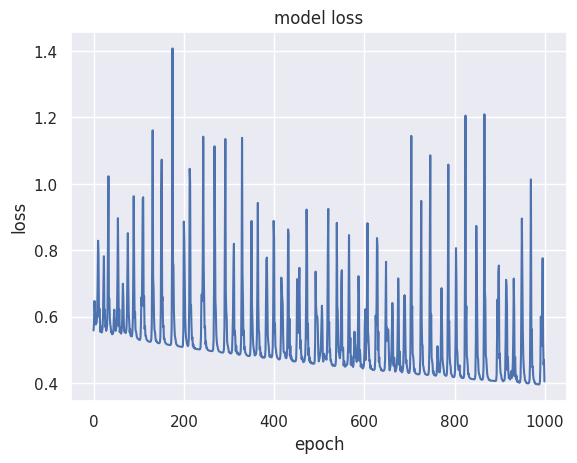

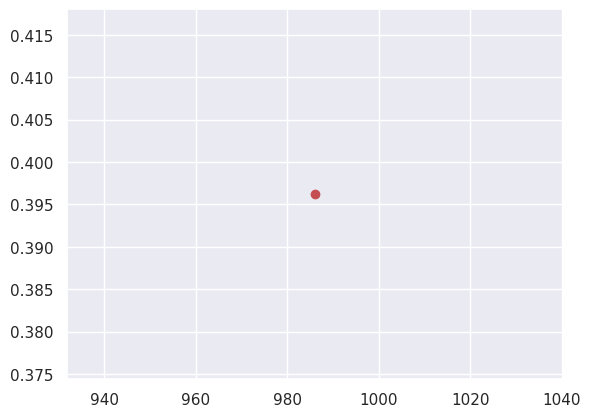

In [174]:
# plot tensorflow training preocess of MSE loss
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.show()
# plot by using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#plot the minimun point value in the fig
min_point = np.min(history.history['loss'])
min_point_index = np.argmin(history.history['loss'])
# print(min_point)
# print(min_point_index)
plt.plot(min_point_index, min_point, 'ro')
